In [1]:
from goose import Goose
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV
from bs4 import BeautifulSoup
from sklearn.neighbors import KNeighborsClassifier
from textblob import TextBlob, Word
from sklearn.base import TransformerMixin
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV
import datetime
%matplotlib inline

In [2]:
use_columns = ['url_raw', 'url_clean', 'url_domain', 'ugly_text', 'issue', 'political lean', 'title', 'meta_description', 'cleaned_text']
pld = pd.read_csv('0_16450.csv', usecols=use_columns)

In [3]:
pld.head(2)

,url_raw,url_clean,url_domain,ugly_text,issue,political lean,title,meta_description,cleaned_text
0,https://www.washingtonpost.com/news/post-natio...,washingtonpost.com/news/post-nation/wp/2016/05...,washingtonpost.com,2 Desktop notifications are ...,abortion,Lean Left,‘A target on Roe v. Wade ’: Oklahoma bill maki...,Gov. Mary Fallin (R) has not said if she plans...,UPDATE: Gov. Fallin vetoed the bill on Friday....
1,http://www.salon.com/2016/04/07/camille_paglia...,salon.com/2016/04/07/camille_paglia_feminists_...,salon.com,\n\n\t\n\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\t...,abortion,Left,"Camille Paglia: Feminists have abortion wrong,...",Reproductive rights have become ideological to...,"While the Hillary flap was merely a blip, give..."


In [4]:
pld_text = pld[pld['cleaned_text'].notnull()]

In [5]:
pld_text['cleaned_text_length'] = pld_text['cleaned_text'].apply(lambda x: len(x))

/Users/stanleystevensWhistle/miniconda2/envs/stanleyyork/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer(ngram_range=(1, 2)))
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, pld_text['cleaned_text'], pld_text['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.624470893991
0:40:11.554321


In [5]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer(ngram_range=(2, 2)))
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, pld_text['cleaned_text'], pld_text['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.614012932429
0:18:06.659433


In [15]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer(ngram_range=(2, 3)))
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, pld_text['cleaned_text'], pld_text['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.617053290395
0:42:20.630361


In [18]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer())
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, pld_text['cleaned_text'], pld_text['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.586550458734
0:06:26.259621


In [24]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer(min_df=0.025))
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, pld_text['cleaned_text'], pld_text['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.552845451357
0:04:32.888663


In [23]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer(min_df=0.05))
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, pld_text['cleaned_text'], pld_text['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.561907396025
0:02:56.787907


In [22]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer(min_df=0.1))
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, pld_text['cleaned_text'], pld_text['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.560887634806
0:01:42.309156


In [19]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer(min_df=0.2))
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, pld_text['cleaned_text'], pld_text['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.506513769165
0:01:12.124221


In [20]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer(min_df=0.5))
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, pld_text['cleaned_text'], pld_text['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.448466690914
0:00:52.875009


In [21]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer(min_df=0.8))
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, pld_text['cleaned_text'], pld_text['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.404928658236
0:00:46.841135


In [25]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer(max_df=0.6))
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, pld_text['cleaned_text'], pld_text['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.578593191153
0:04:40.668603


In [6]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer(ngram_range=(1, 2), min_df=2))
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, pld_text['cleaned_text'], pld_text['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.622991267579
0:27:09.080925


In [7]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer(ngram_range=(1, 2), min_df=3))
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, pld_text['cleaned_text'], pld_text['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.622210627145
0:20:33.605610


In [9]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer(ngram_range=(1, 2), min_df=4))
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, pld_text['cleaned_text'], pld_text['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.623302245316
0:15:37.979483


In [10]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer(ngram_range=(1, 2), min_df=5))
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, pld_text['cleaned_text'], pld_text['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.621975339045
0:15:47.113999


In [11]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer(ngram_range=(1, 2), min_df=6))
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, pld_text['cleaned_text'], pld_text['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.621975673894
0:14:13.363330


In [ ]:
from sklearn import decomposition
from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):

    def transform(self, X, y=None, **fit_params):
        return X.todense()

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X)

    def fit(self, X, y=None, **fit_params):
        return self

In [15]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer(ngram_range=(1, 2))),
        ('dense', DenseTransformer()),
        ('pca', decomposition.PCA(n_components=20))
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, pld_text['cleaned_text'], pld_text['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

AttributeError: 'Series' object has no attribute 'todense'

In [ ]:
vect = CountVectorizer(ngram_range=(1, 2))
pca = decomposition.PCA(n_components=5)
dense = DenseTransformer()
lr = LogisticRegression()

pipe = Pipeline(steps=[('transform', vect), ('dense', dense), ('pca', pca), ('lr', lr)])
cross_val_score(pipe, pld_text['cleaned_text'], pld_text['political lean'], cv=5, scoring='accuracy').mean()

url_raw                35
url_clean              35
url_domain             35
ugly_text              30
issue                  35
political lean         35
title                  35
meta_description       30
cleaned_text           35
cleaned_text_length    35
dtype: int64


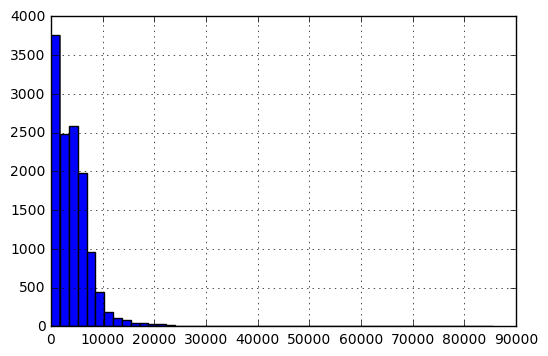

In [13]:
print pld_text[pld_text.cleaned_text_length < 50].count()
pld_text['cleaned_text_length'].hist(bins=50)

In [14]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer())
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, pld_text['cleaned_text'], pld_text['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.586550458734
0:07:18.939561


In [23]:
greater_250 = pld_text[pld_text.cleaned_text_length > 250]
greater_500 = pld_text[pld_text.cleaned_text_length > 500]

In [25]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer(ngram_range=(1, 2)))
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, greater_250['cleaned_text'], greater_250['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.601791888985
0:46:11.811067


In [24]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer())
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, greater_500['cleaned_text'], greater_500['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.549921622561
0:05:12.046141
